In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten,Dropout
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/digit/final.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,0,0,0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,0,0,0,77,151,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,21,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,3,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,0,27,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [ ]:
labels = data[["784"]]
data.drop(data.columns[[784]],axis = 1,inplace = True)
print(type(data))

KeyError: ignored

In [ ]:
data = data / 255.0

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.874510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.87451,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.12549,0.482353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301961,0.592157,0.243137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.082353,0.082353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.862745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.552941,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.486275,0.231373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105882,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.105882,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.819608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301961,0.368627,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.698039,0.301961,0.301961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.909804,0.909804,0.090196,0.074510,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.07451,0.454902,0.862745,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.

In [ ]:
import tensorflow as tf
cat = tf.keras.utils.to_categorical(labels, num_classes=16, dtype='float32')

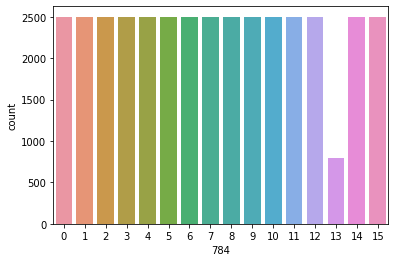

In [ ]:
sns.countplot(data = labels,x = '784')

In [ ]:
from sklearn.model_selection import train_test_split
train_x2,test_x2,train_y2,test_y2 = train_test_split(data,cat,test_size=0.2,random_state = 42)

In [ ]:
df = pd.DataFrame(train_y2)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
print(train_x2.shape)
print(train_y2.shape)
print(test_x2.shape)
print(test_y2.shape)

(30640, 784)
(30640, 16)
(7660, 784)
(7660, 16)


Data Augmenetation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

NameError: ignored

In [ ]:
data_list = []
for i in range(train_x2.shape[0]):
  data_list.append(np.array(train_x2[i:i+1]).reshape(28,28,1))
print(len(data_list))  

30640


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten(input_shape = (28,28,1)))

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [ ]:
history = model.fit(np.array(data_list),train_y2, callbacks=[callback],epochs=10, batch_size=100,shuffle=True,verbose=1)

Epoch 1/10
307/307 [==============================] - 20s 62ms/step - loss: 0.8542 - accuracy: 0.7378
Epoch 2/10
307/307 [==============================] - 19s 62ms/step - loss: 0.3465 - accuracy: 0.8879
Epoch 3/10
307/307 [==============================] - 19s 62ms/step - loss: 0.2537 - accuracy: 0.9164
Epoch 4/10
307/307 [==============================] - 19s 62ms/step - loss: 0.2021 - accuracy: 0.9323
Epoch 5/10
307/307 [==============================] - 19s 62ms/step - loss: 0.1658 - accuracy: 0.9449
Epoch 6/10
307/307 [==============================] - 19s 62ms/step - loss: 0.1467 - accuracy: 0.9485
Epoch 7/10
307/307 [==============================] - 19s 62ms/step - loss: 0.1347 - accuracy: 0.9542
Epoch 8/10
307/307 [==============================] - 19s 62ms/step - loss: 0.1184 - accuracy: 0.9595
Epoch 9/10
307/307 [==============================] - 19s 62ms/step - loss: 0.1110 - accuracy: 0.9597
Epoch 10/10
307/307 [==============================] - 19s 62ms/step - loss: 0.103

In [ ]:
data_list_test = []
for i in range(test_x2.shape[0]):
  data_list_test.append(np.array(test_x2[i:i+1]).reshape(28,28,1))
print(len(data_list_test)) 
print(data_list_test[0].shape) 

7660
(28, 28, 1)


In [ ]:
test_loss, test_acc = model.evaluate(np.array(data_list_test),test_y2, verbose=2)

print('\nTest accuracy:', test_acc)

240/240 - 2s - loss: 0.0935 - accuracy: 0.9692

Test accuracy: 0.9691905975341797


In [ ]:
print(data_list_test[0].shape)

(28, 28, 1)


In [ ]:
print(np.array(data_list_test).shape)

(7660, 28, 28, 1)


In [ ]:
predictions = model.predict(np.array(data_list_test))

In [ ]:
predictions[0]

array([5.7161206e-01, 4.4959306e-06, 8.1302058e-03, 1.6639333e-05,
       5.4691704e-06, 3.7846464e-06, 5.7784109e-07, 2.0006139e-07,
       2.6536998e-06, 1.6218331e-05, 1.3898016e-07, 1.6233084e-10,
       3.9715017e-10, 1.7901809e-07, 1.8215701e-06, 4.2020562e-01],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
test_y2[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
# 0 == 0
# 1 == 1
# 2 == 2
# 3 == 3
# 4 == 4
# 5 == 5
# 6 == 6
# 7 == 7
# 8 == 8
# 9 == 9
# + == 10
# - == 11
# x(times) == 12
# /,div == 13
# y == 14
# z == 15
class_names = ["0", "1","2","3","4","5","6","7","8","9","+(addition)","-(Subtraction)","X(Multiplication)","/(Division)","y","z"]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  result = 0
  for i in range(16):
    if true_label[i] == 1:
      result = i
      break
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img = img.reshape(28,28)
  print(type(img))
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  # print("The predicted label is " + str(predicted_label))
  # print("The true label is " + str(result))
  if predicted_label == result:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[result]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  result = 0
  for i in range(16):
    if true_label[i] == 1:
      result = i
      break
  plt.grid(False)
  plt.xticks(range(16))
  plt.yticks([])
  thisplot = plt.bar(range(16), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[result].set_color('blue')

<class 'numpy.ndarray'>


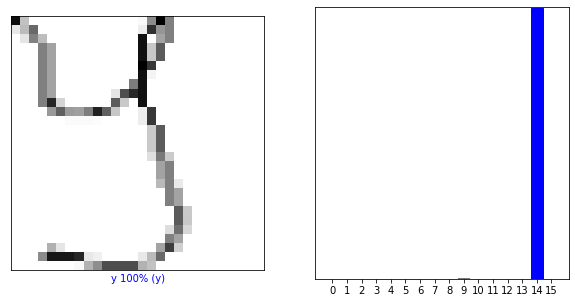

In [ ]:
i = 766
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_y2, data_list_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_y2)
plt.show()

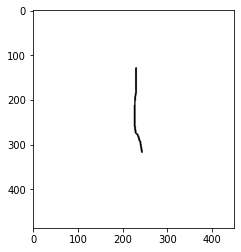

In [ ]:
img = cv2.imread("1.png")
plt.imshow(img)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


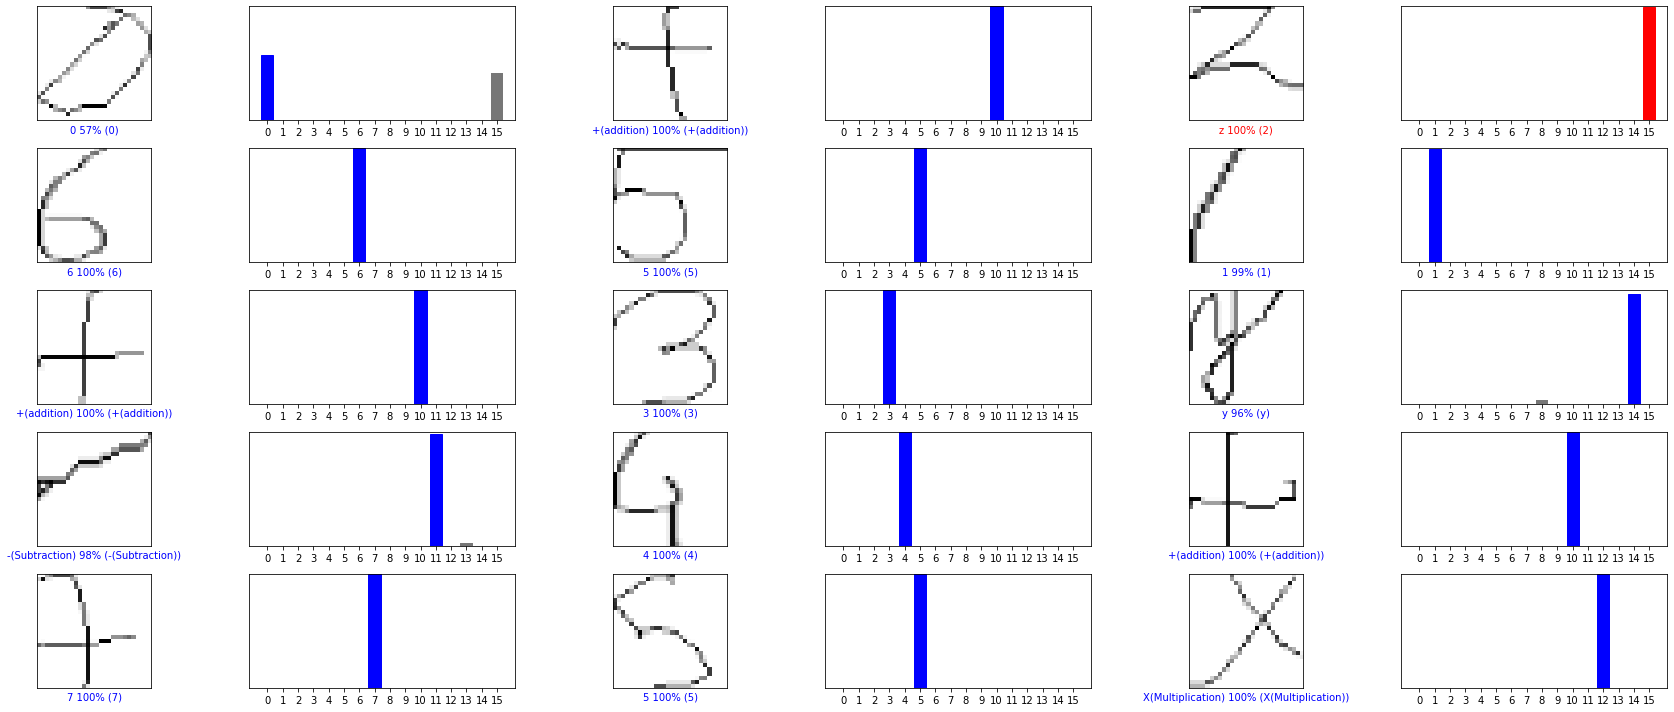

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_y2, data_list_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_y2)
plt.tight_layout()
plt.show()

In [ ]:
model.save("model2.h5")